###  Customer Churn Prediction
Customer churn is the number of customer leaving from using the  company service. It is the critical thing to the company to known about it  since it directly impacts in the  business growth. There is said  that it is really hard to bring back churned customer than the new customer. Thus, it better to know in beforehand the caused reasons of customer churn.  The customer churn can happen due to reasons like 1) either not happy with the company services(switch to other company) or 2) customer own circumstances(eg. relocation, death, etc)

In this project, the tele-communicaton dataset is used to figure out the reason of customer churn in the company. Basically, the following questions are answered in this work. 
1. What are the reasons of cusotmer churn?
2. Which cutomers(who) are most likely to churn?
3. Suggest the customer retention strategy
4. Build and Compare different Machine Learning Algorithms and find the best one




### Table of Contents
<a href="#data" style="text-decoration:none"> 1.Data </a><br>
   &nbsp; &nbsp; <a href="#dataoverview" style="text-decoration:none ">1.1 Data Overview</a><br>
   &nbsp; &nbsp; <a href="#datamanipulation" style="text-decoration:none ">1.2 Data Manipulation</a> <br> 
   
   
   
<a href="#dataed" style="text-decoration:none"> 2.Exploratory Data Analysis  </a><br>
   &nbsp; &nbsp; <a href="#datacd" style="text-decoration:none ">2.1 Visualize Class distribution</a><br>
   &nbsp; &nbsp; <a href="#datavd" style="text-decoration:none "> 2.2 Variables distribution </a><br>
   &nbsp; &nbsp; <a href="#dataob" style="text-decoration:none ">2.3 Observation</a> <br>
   
<a href="#datapr" style="text-decoration:none"> 3. Data Preprocessing  </a><br>
   &nbsp; &nbsp; <a href="#datadu" style="text-decoration:none ">3.1 Change category value into dummy</a><br>
   &nbsp; &nbsp; <a href="#datasd" style="text-decoration:none "> 3.2 Standardizing features</a><br>
    &nbsp; &nbsp; <a href="#datats" style="text-decoration:none ">3.3 Split Train and Test split </a> <br>
   &nbsp; &nbsp; <a href="#dataim" style="text-decoration:none ">3.4 Handle Imblanced Data</a> <br>
 
 
 
 <a href="#model" style="text-decoration:none"> 4. Model  </a><br>
   &nbsp; &nbsp; <a href="#modellr" style="text-decoration:none ">4.1 Logistic regression</a><br>
   &nbsp; &nbsp; <a href="#modeldt" style="text-decoration:none "> 4.2 Decision Tree Classifier</a><br>
  &nbsp; &nbsp; <a href="#modelrf" style="text-decoration:none ">4.3 Random Forest </a> <br>
   &nbsp; &nbsp; <a href="#modelgb" style="text-decoration:none ">4.4 Gradient Boosting</a> <br>
   &nbsp; &nbsp; <a href="#modelxgb" style="text-decoration:none ">4.5 XGBoost Classifier </a> <br>
   &nbsp; &nbsp; <a href="#modelxgl" style="text-decoration:none ">4.6 Lightgbm Classifer</a> <br>



 <a href="#conclusion" style="text-decoration:none"> 5. Conclusion  </a><br>


In [2]:
# import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
import plotly.offline as py
import plotly.figure_factory as ff #for table visualization
from sklearn import tree
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE # for handeling unbalanced data
from sklearn.externals import joblib
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score, precision_score, f1_score



### <a id = "data" style="text-decoration:none"> 1.Data </a>


In [3]:
'''=== function to load dataset ===='''
def load_daset(dataset):
    df =pd.read_csv(dataset)
    return df


In [4]:
# call load_daset()
df = load_daset('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#drop customerID column and show last 10 rows
df_copy = df.copy()#copy datafram
data = df_copy.drop('customerID', axis=1) 
data.tail()
    

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### <a id = "dataoverview" style="text-decoration:none"> 1.1 Data Overview </a>

In [6]:

print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())


Rows     :  7043
Columns  :  20

Features : 
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


### Note:
In this dataset, there are  7043 rows(obseravations) and  19 columns(features) and last columns as predictive variable

In [7]:
'''===  Show descriptive statistics for numerical and categorical === '''

#numerical only
print('Descriptive statistics for numerical\n')
print(data.describe())


#categorical only
data.describe(include='O') 


Descriptive statistics for numerical

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
# check datatype of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


#### Note:
The above output shows that the majority of variables are of categorical datatype (object). This categorical datatype should be changed into numerical one before feeding to machine learning algorithms.


And, It was also noticed that the column 'TotalCharges' is appeared as non- float data type though it should be float type. So, lets convert all the values in that columns as float data type. The non numeric values changed into NaN value after following command.

### <a id = "datamanipulation" style="text-decoration:none"> 1.2 Data Manipulation </a>

In [9]:
# convert columns 'MonthlyCharges' as float data type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


#### Note: 
Now 'TotalCharges' is changed to float data type. And, the total counts is  only 7032 out of 7043 observations. It seems that there is NaN values. Lets check out and remove them.


In [10]:
'''== check Null  values in all columns ===='''
# show the rows with NaN values 
print('No. of rows with NaN: {}'.format(data[data.isnull().any(axis=1)].shape[0]))

No. of rows with NaN: 11


In [11]:
#remove all Null values 
data = data.dropna()
data.shape


(7032, 20)

In [12]:
#drop duplicate except first occurance 
#data[data.duplicated()]
data = data.drop_duplicates( keep='first')
data.shape

(7010, 20)

In [13]:
# check the catergory values in each category column
caterogy_column = data.select_dtypes(include='object')
for x in caterogy_column.columns:
    print(x,':', data[x].unique())
    
    

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


### Note:
In the above ouput, there is two different words in a column but refereing to the same meaning, for example, 'No phone service' and 'No', 'No' and  'No internet service'. Lets make them to same one.

In [14]:
'''change into same word- NO'''

binary_for = { 'No phone service':'No', 'No internet service':'No'}

# function to convert catergory values into numeric
def convert_value_binary(col_names: list):
     for col in col_names:
            data[col] = data[col].replace(binary_for)


 

In [15]:
#columns to change its category values
columns = ['MultipleLines', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']

#call function
convert_value_binary(columns)
data.head(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### <a id="dataed" style="text-decoration:none"> 2. Exploratory Data Analysis  </a>
In this section, each variables are visulaized and  analyised with regard to predicitive class(churn or not churn). The answers for the questions no. 1, 2 and 3 are tried to figure out in this part.

### <a id="datacd" style="text-decoration:none ">2.1 Visualize Class distribution</a>

Class count: 
 No     5153
Yes    1857
Name: Churn, dtype: int64


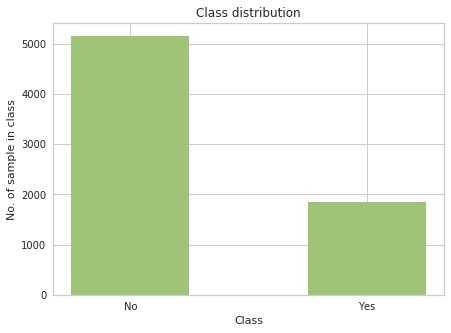

In [17]:
'''==== check class/label distribution in dataset  ===='''


class_count = data['Churn'].value_counts()
print('Class count: \n',class_count) # each class with total no. sample of data
y_pos = [class_count[0], class_count[1]] #  for y_axis 
x_pos = ['No', 'Yes'] # for axis 

# creates bar chart of class labels
plt.figure(figsize=(7,5))
plt.bar(x_pos, y_pos, width=0.50, color='g')
plt.xlabel('Class')
plt.ylabel('No. of sample in class')
plt.title('Class distribution')
plt.show()

#''' === another way to plot using frequency distribution ==='''

# creates histogram figure
#class_dist1 =list(np.array(df['Churn'])) # takes class column
#plt.figure()
#plt.hist(class_dist1)
#plt.xlabel('Class')
#plt.ylabel('No. of sample in class')
#plt.title('Class distribution')
#plt.show()


### Note:
In the above bar chart, it clearly shows that the class label are imbalanced i.e. class- Yes(27%) and class- No(73%) of total dataset. Thus, we need to balance them either by upsampling the class- Yes or undersampling the class-No so that the model will predict the unseen data corretly to both class. Otherwise, the model will bias with the majority of class. So, it is handle in  <a href="dataim" style="text-decoration:none ">imblance data section </a>




### <a id="datavd" style="text-decoration:none "> 2.2 Variables distribution  </a>


Show  gender in Class Distribution 


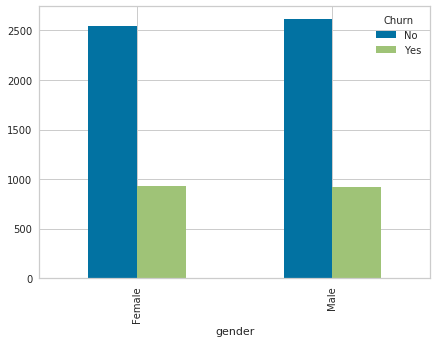




Show  SeniorCitizen in Class Distribution 


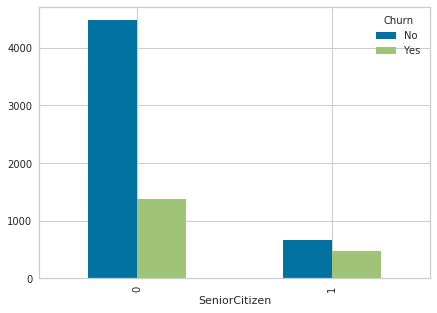




Show  Partner in Class Distribution 


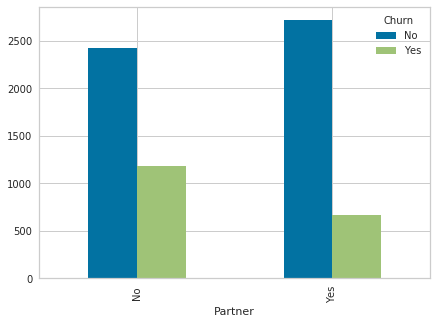




Show  Dependents in Class Distribution 


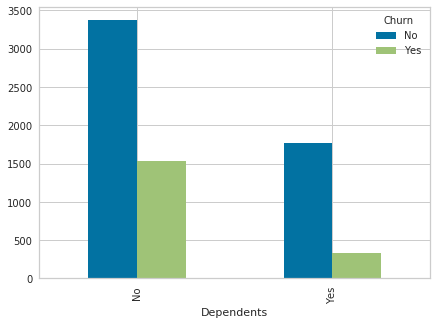




Show  tenure in Class Distribution 


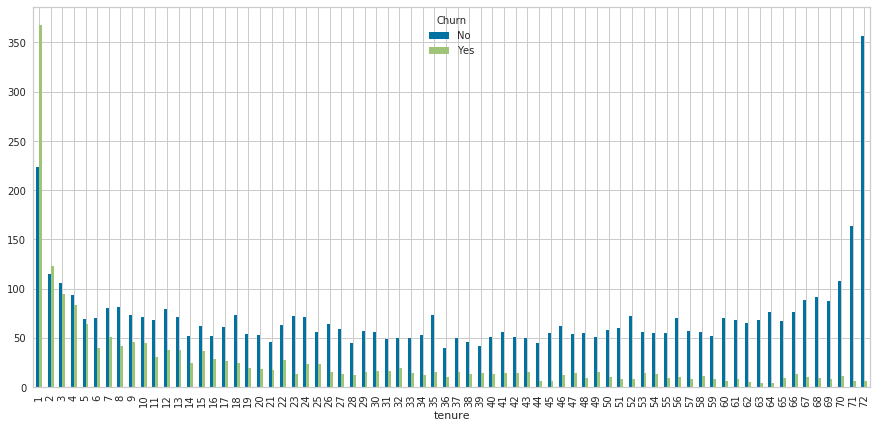




Show  PhoneService in Class Distribution 


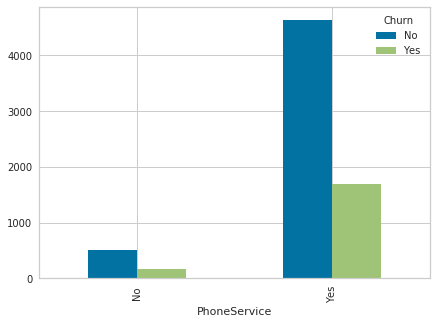




Show  MultipleLines in Class Distribution 


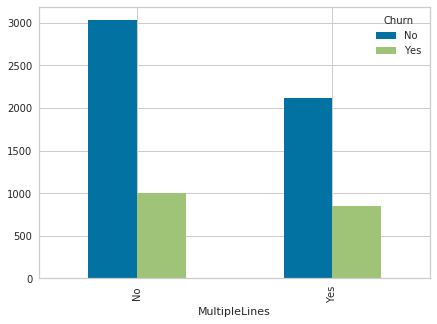




Show  InternetService in Class Distribution 


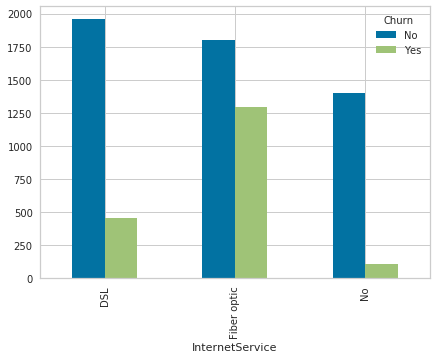




Show  OnlineSecurity in Class Distribution 


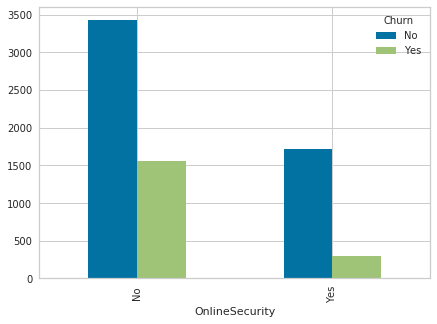




Show  OnlineBackup in Class Distribution 


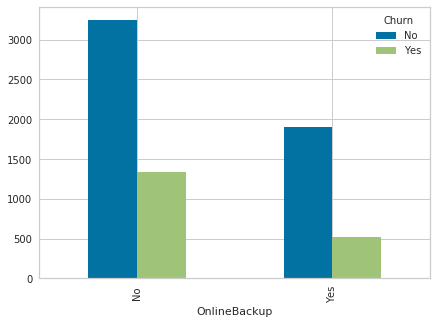




Show  DeviceProtection in Class Distribution 


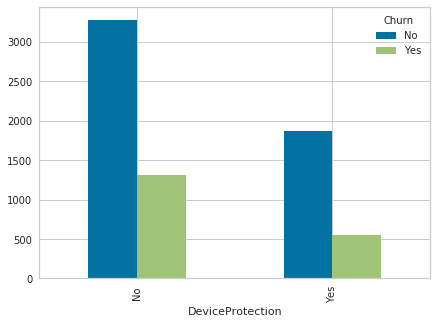




Show  TechSupport in Class Distribution 


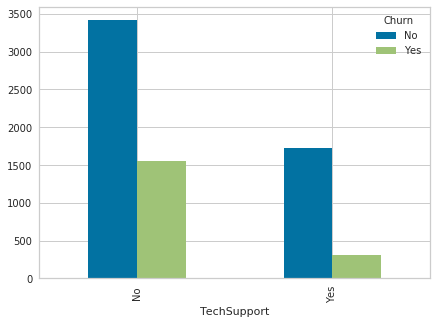




Show  StreamingTV in Class Distribution 


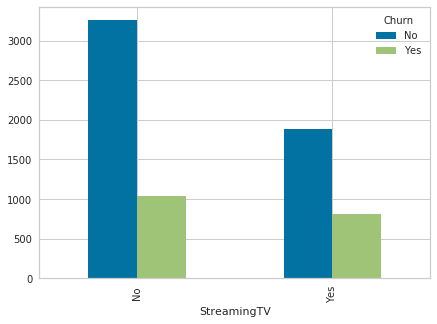




Show  StreamingMovies in Class Distribution 


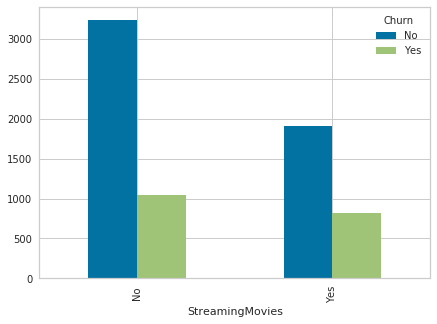




Show  Contract in Class Distribution 


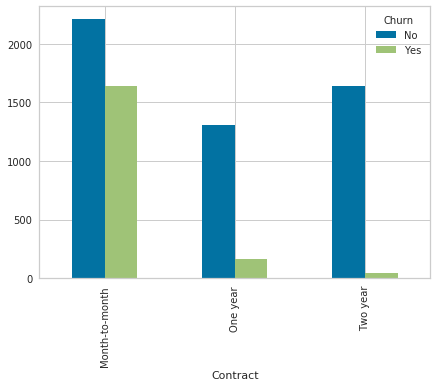




Show  PaperlessBilling in Class Distribution 


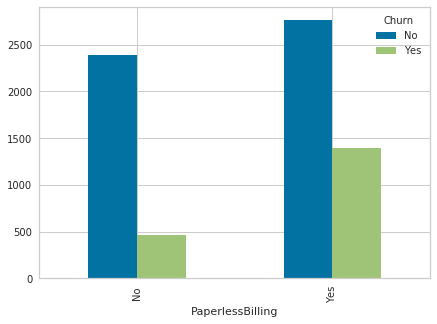




Show  PaymentMethod in Class Distribution 


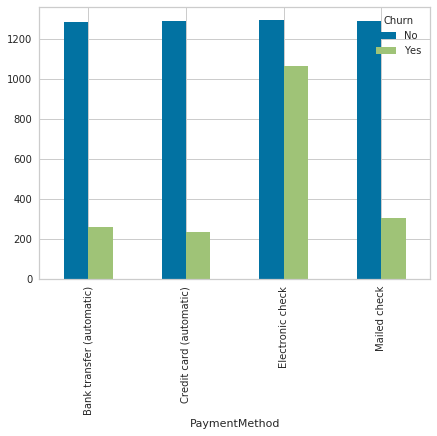

In [85]:

variable_not = ['MonthlyCharges', 'TotalCharges']
#show barchart of all coloumns 
for x in data.columns[:-1]:
    
    if x not in variable_not:
        print('Show  '+ x + ' in Class Distribution ')
        #a =data.groupby([x, 'Churn']).size().unstack(fill_value=0)
        if x == 'tenure':
            pd.crosstab(data[x],data['Churn']).plot.bar(figsize=(15,7))
            plt.show()
            print('\n\n')
            
            
        else:
            pd.crosstab(data[x],data['Churn']).plot.bar(figsize=(7,5))
            plt.show()
            print('\n\n')
            
       



#### Lets further visualize  and try to know customer churn based on services with contract type. 


Show  PhoneService with contract type 


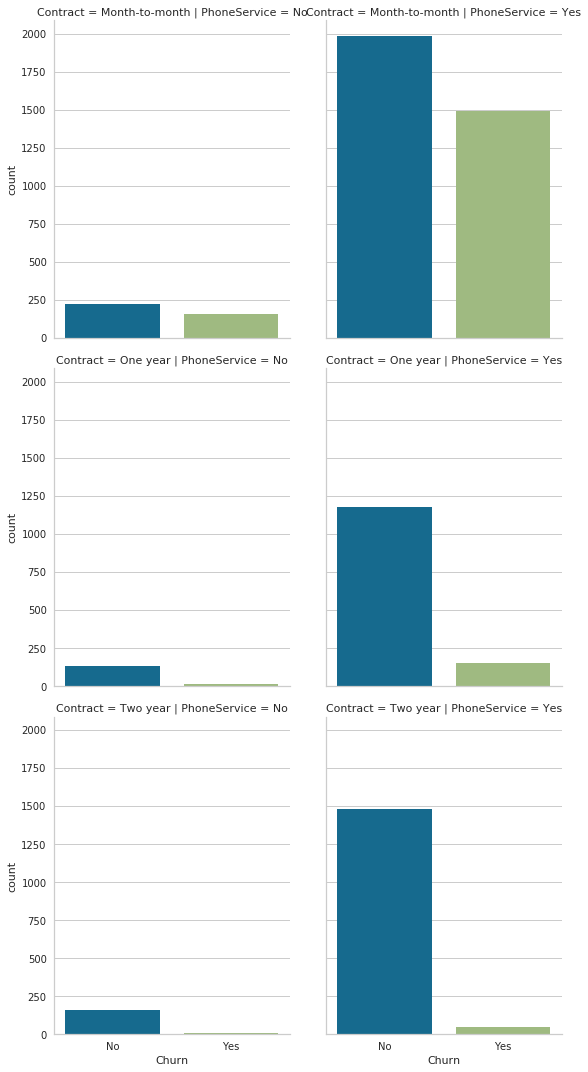




Show  MultipleLines with contract type 


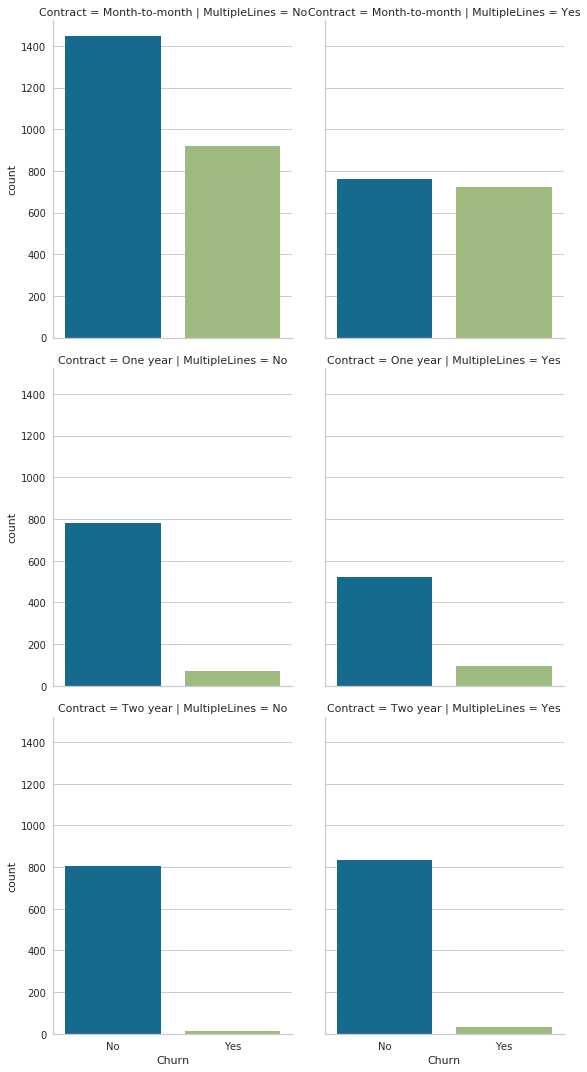




Show  InternetService with contract type 


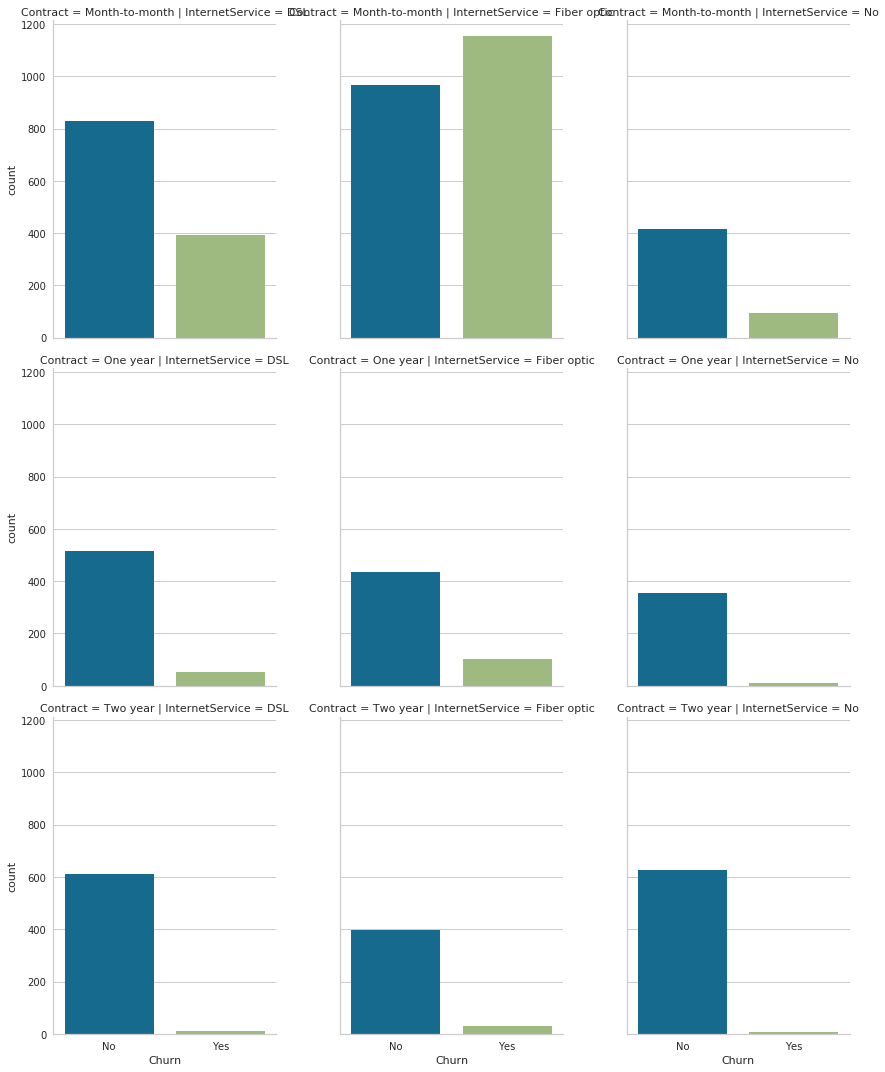




Show  OnlineSecurity with contract type 


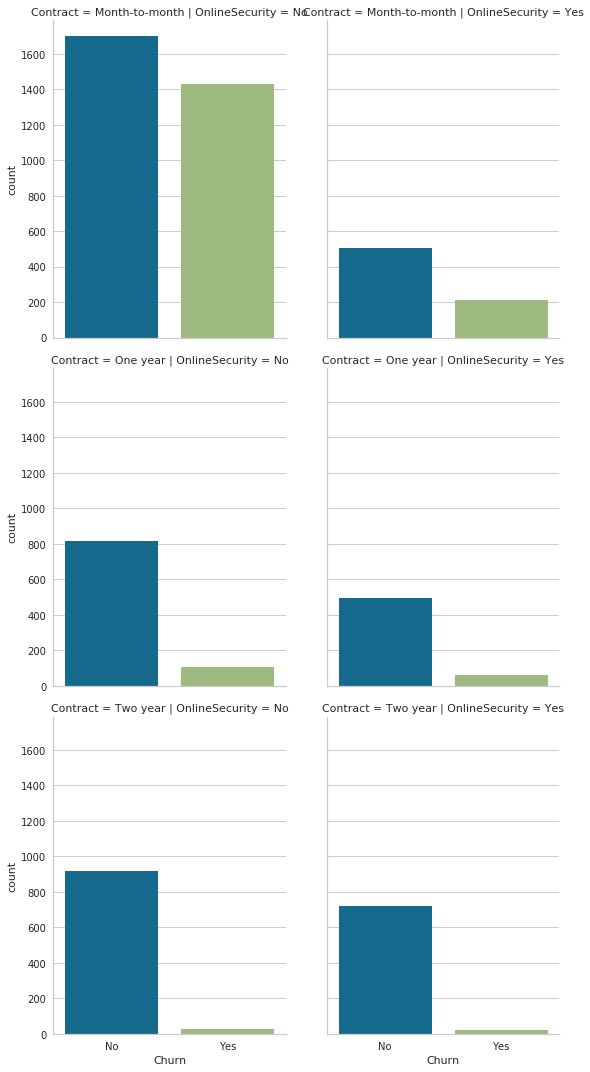




Show  OnlineBackup with contract type 


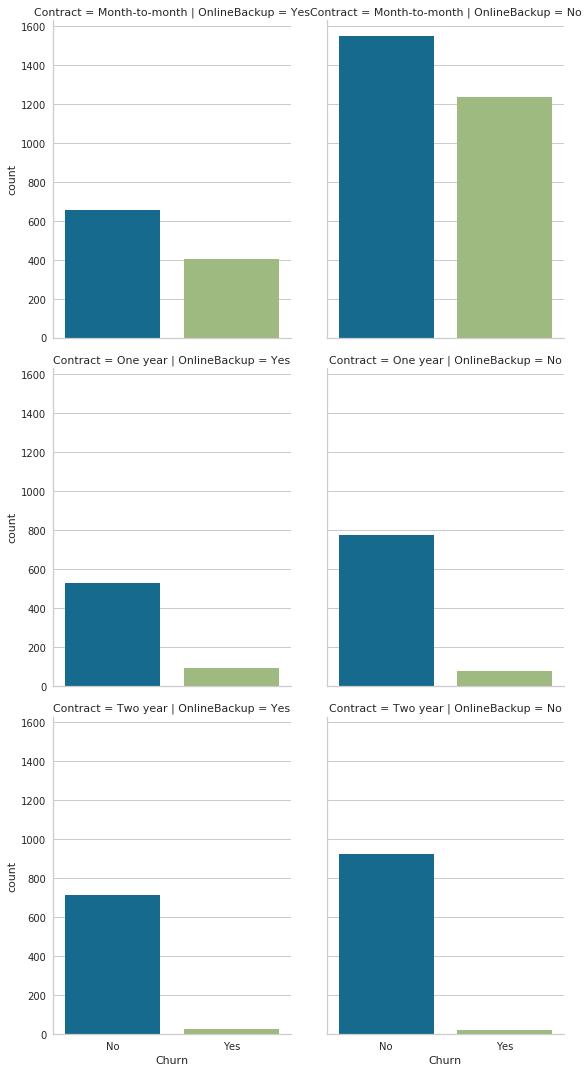




Show  DeviceProtection with contract type 


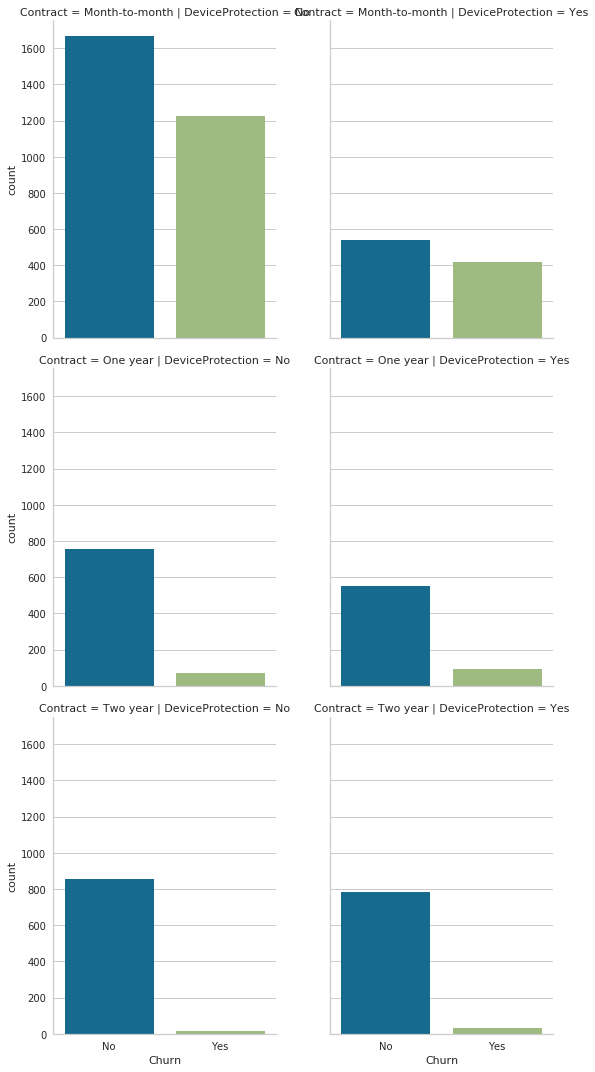




Show  TechSupport with contract type 


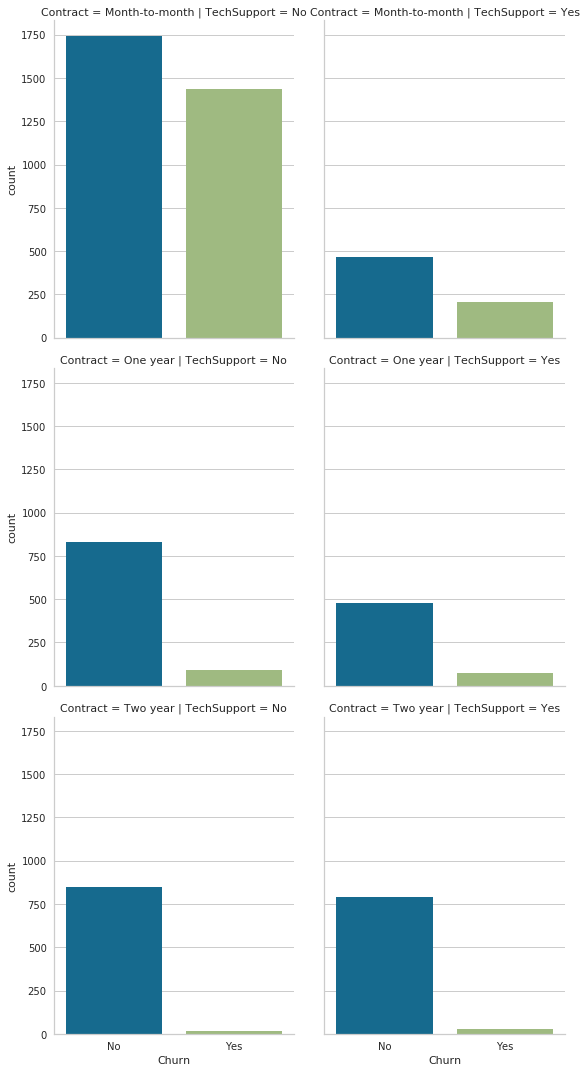




Show  StreamingTV with contract type 


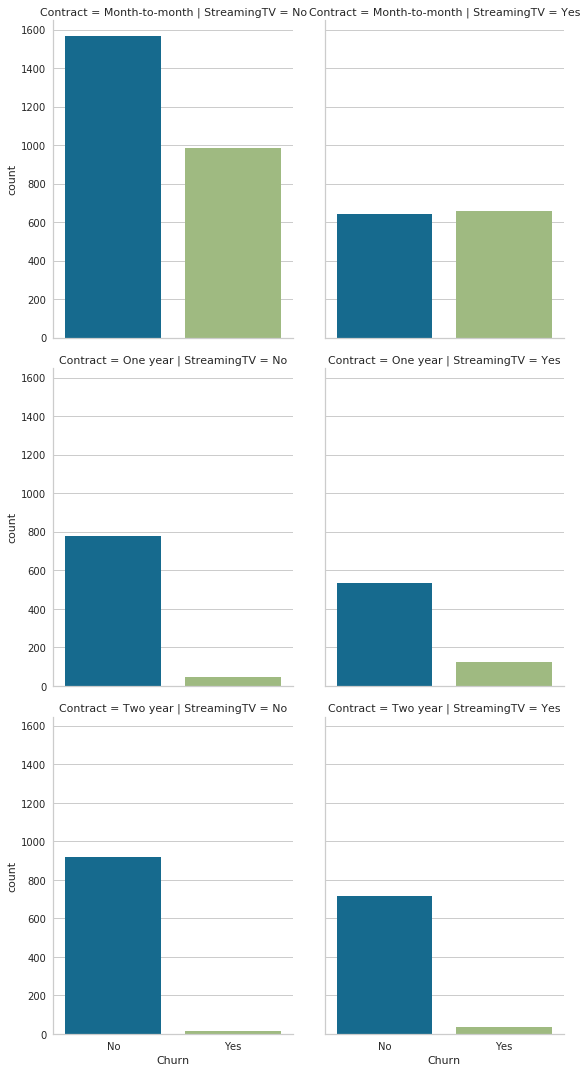




Show  StreamingMovies with contract type 


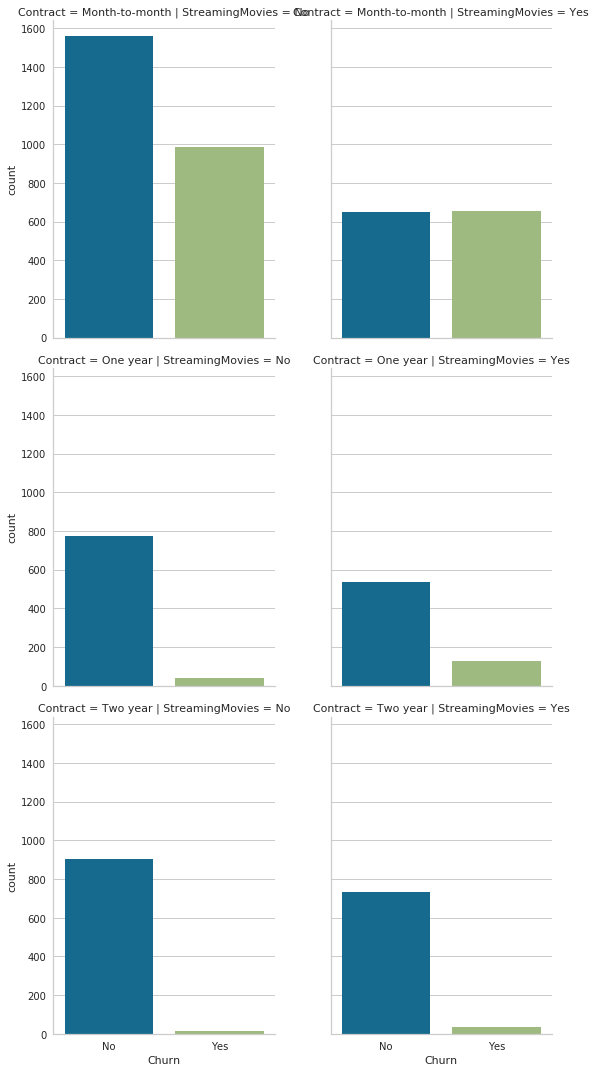

In [729]:
"""=== Lets try to anylize the services  based on the contract types ==="""

lists_ofservice = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies',]

for x in  lists_ofservice:
    print('Show  '+ x + ' with contract type ')
    g = sns.catplot('Churn', col=x, row ='Contract', data=data, kind='count', aspect=0.8, hue_order=['g', 'b']) # bar plot
    plt.show()
    print('\n\n')

 ### <a id ="dataob" style="text-decoration:none ">2.3 Observation</a> <br>
   


From the above plots, it is clearly noticed that the large of protion of customer churn are from those customers who has short tenure, phone service(yes), multiplelines(No), oniline security(No), online backup(No), Device protection(No), Techsupport(No), fiber optic as internet service, month-to-month contract type, electronic check payment type.

Especially the customer who has short contract type i.e. month-to-month are most likely to churn. 

The reasons might be: 
1) Company doesn't take necessary steps before contract end,
2) Customer might get better offer from another company, and 
3) Since the majority of leaving customer  are from  'phone service' and 'internet-service(Fiber-optic)', the services in these categories should be checked/revised to make sure they are providing the really  better service than the competitor.

### <a id="datapr" style="text-decoration:none"> 3. Data Preprocessing  </a>

#### <a id="datadu" style="text-decoration:none ">3.1 Change category value into dummy </a>


In [18]:
#change the category values into dummy variable and drop the first column(to avoid dummy trap)
df_dummy= pd.get_dummies(data.iloc[:,:-1], drop_first=True)
df_dummy = pd.concat([df_dummy, data['Churn']], axis=1)
print('Dimension of dataset after dummy variable applied:\n',df_dummy.shape)
df_dummy.head()

Dimension of dataset after dummy variable applied:
 (7010, 24)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,No
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,No
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,Yes
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,No
4,0,2,70.70,151.65,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,Yes


#### <a id="datasd" style="text-decoration:none ">3.2 Standardizing features </a>

In [19]:
# apply zscore to ceratain columns
columns = ['tenure', 'MonthlyCharges','TotalCharges']
new_data = df_dummy.copy()
new_data[columns] = new_data[columns].apply(zscore) 
new_data.tail()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
7038,0,-0.347506,0.662329,-0.132289,1,1,1,1,1,0,...,1,1,1,1,0,1,0,0,1,No
7039,0,1.610184,1.274384,2.237896,0,1,1,1,1,1,...,0,1,1,1,0,1,1,0,0,No
7040,0,-0.877714,-1.173839,-0.857607,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,No
7041,1,-1.163210,0.316384,-0.875188,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,1,Yes
7042,0,1.365473,1.355881,2.009189,1,0,0,1,0,1,...,1,1,1,0,1,1,0,0,0,No


#### <a id="datats" style="text-decoration:none ">3.3 Train and Test split </a>

In [20]:
#split data into train (70%) and test (30%)
def data_split(data, test_size):
    '''
    data = data to split
    test_size = size of test-data
    '''
    train, test = train_test_split(data, stratify=data['Churn'], test_size = test_size, random_state=3)
    X_train = train.drop(['Churn'], axis=1) # drop 'Churn' column
    y_train = train['Churn'] # Churn column for train 
    X_test = test.drop(['Churn'], axis=1) # drop 'Churn' column
    y_test = test['Churn'] # Churn column for test

    return X_train, y_train, X_test, y_test


In [21]:
#call data split function
X_train, y_train, X_test, y_test = data_split(new_data, 0.3)

In [22]:
# check ratio of train and test based on class label
print(y_test.value_counts()[0]/(y_test.value_counts()[1]+y_test.value_counts()[0])) # class 'No churn'
print(y_test.value_counts()[1]/(y_test.value_counts()[1]+y_test.value_counts()[0])) #clas 'Churn'


0.7351402757964812
0.2648597242035188


#### <a id="dataim" style="text-decoration:none ">3.4 Handle Imbalanced Data </a>

For handling this imblanced data, over-sampling technique(SMOTE) is used. So that the both class will have equal sample. In this case, up-sampling only to the train dataset, but test datset set should be as it is. This is done in the section below- model building.


In [23]:
'''=== up-sampling is done to the minority class. So that it becomes 
  balanced. This is done only to train data but not to test data ==='''

#over-sampling the data
def up_sampling(X_train, y_train):
    '''
    X_train = Input features of training dataset
    y_train = Ouput/class of training dataset
    '''
    sm = SMOTE(random_state=42, ratio=1.0) # SMOTE is apply for up-sampling
    X_train_new, y_train_new = sm.fit_sample(X_train, y_train) # up-sampling only the train data
    return X_train_new, y_train_new

In [24]:
# call up_sampling function
X_train_new, y_train_new = up_sampling(X_train, y_train)
print('Before up-sampling:\n', y_train.value_counts())
print()
unique_elements, counts_elements = np.unique(y_train_new, return_counts=True)
#print('\n After up-sampling:', np.bincount(X_train_new)) for int values types
print('\n After up-sampling:', counts_elements)

Before up-sampling:
 No     3607
Yes    1300
Name: Churn, dtype: int64


 After up-sampling: [3607 3607]


### <a id="model" style="text-decoration:none ">3.4 Model </a>
The gridSearchCV with 10 Cross-validation(CV) is used for tunning the parameteres (find the optimal parameters) for each of algorithms. And, the selected optimal parameters is used to to buld the model and evaluated with test data. The confusion matrix from each model are displayed. AUC score, classification accuracy are  used for model perfomance. 


In [25]:
"""== return best parameter =="""

#parameter tuning with gridsearch
def find_optimal_para(algorithm, parameters, cv, X_train, y_train):
    """
    algorithm =  instance of alorithms
    parameters = list of parameter 
    cv = no. of cross-validation
    X_train = training dataset(features)
    y_train = training dataset(labels)
    
    """
    best_clf = GridSearchCV(algorithm, parameters, cv =cv) 
    best_clf.fit(X_train,y_train)
    return best_clf.best_params_
    

In [26]:
"""== return clasification accuracy, confusion matrix and  classification report =="""

#model evaluate
def model_evaluaton(model, X_test, y_test ):
    """
    model= final model(parameter tunned)
    X_test = testing datset(features)
    y_test = testing dataset(labels)
    
    """
    predict = model.predict(X_test)  # prediciton on test data
    accu_score = accuracy_score(predict, y_test)# clasification accuracy
    con_matrix = confusion_matrix(predict, y_test) # confusion matrix
    cla_report = classification_report(predict, y_test) # classification report
    return accu_score, con_matrix, cla_report
    


In [27]:
#creates confustion matrix(from yellobrik)
def confusion_Matrix(model,  X_test, y_test, label):
    """
    model = final model(parameter tunned)
    X_test = testing datset(features)
    y_test = testing dataset(labels)
    label =  labels/ouputs in list, e.g ['Yes', 'No']
    
    """
    # ConfusionMatrix  model
    cm = ConfusionMatrix(model, classes=label)
    
    # Fit fits the passed model. 
    #cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.finalize()

In [28]:
'''=== ROC curve  plot ===='''
def creat_roc_curve(model, X_test, y_test, pos_label):
    
    """
    model = final model(parameter tunned)
    X_test = testing datset(features)
    y_test = testing dataset(labels)
    pos_label = postive class(either in integer or string), eg. 'Yes'
    
    
    """
    y_test_prob_tune = model.predict_proba(X_test)#class probabilities for Auc_score
    prob_pstive = [p[1] for p in y_test_prob_tune] # probabilty for positive class
    auc_score = roc_auc_score(y_test, prob_pstive)
    #print('Auc_score:', auc_score)


    #create figure- area under curve
    fpr,tpr,thresholds = roc_curve(y_test, prob_pstive, pos_label=pos_label) # find true positve, false positive rate and thresholds

    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, marker='o',label="auc_score = " + str(auc_score))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4)
    plt.show()

In [29]:
"""=== train model with best paramter and evalute perfomance ==="""

#train model 
def train_evaluate_model(algorithm, parameters,cv, X_train, y_train, X_test, y_test, label, pos_label ):
    """
    algorithm = instance of alorithms , 
    parameters = list of parameter ,
    cv = no. of cross-validation,
    X_train = train dataset(features),
    y_train = train dataset(labels),
    X_test = test dataset(features),
    y_test = testa dataset(labels),
    label = labels/ouputs in list, e.g ['Yes', 'No'], 
    pos_label = postive class(either in integer or string), eg. 'Yes'
    """
    
    
    best_parmeter = find_optimal_para(algorithm, parameters, cv, X_train, y_train) # return best parameter
    print('best parameter: ', best_parmeter)
    print()
    
    alg_with_best_par =  algorithm.set_params(**best_parmeter) # create algorithm instance with best parameter
    alg_with_best_par.fit(X_train_new, y_train_new) #fit training data
    accu_score, con_matrix, cla_report = model_evaluaton(alg_with_best_par,X_test, y_test) # call model_evaluaton
    print( 'Classification acurracy:', accu_score)
    print('\nConfusion Matrix:\n', con_matrix)
    print('\nclassification_report:\n', cla_report )
    print()
    
    print( 'Confusion Matrix from yellobrick:')
    confusion_Matrix(alg_with_best_par,  X_test, y_test, label)
    print()
  
    creat_roc_curve(alg_with_best_par, X_test, y_test, pos_label)
    
    #return model 
    return alg_with_best_par
    

In [30]:
"""== function to save model =="""
# save the model to disk
def save_model(model, file_name):
    joblib.dump(model, 'Models/'+ file_name) #save in Models folder
    return ('Model saved')


### <a  id ="modellr" style="text-decoration:none ">4.1 Logistic regression</a><br>
   

In [32]:
 
#parameter
parameter_lr = {
    #'penalty' : ['l1', 'l2'],
    'C' :  [0.001,0.01,0.1,1,10,100],# regularization parameter.  C = 1/λ.
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'] # optimizer
}

#no. of fold forcross-validaton
cv = 10

#train dataset
train_features= X_train_new
train_labels = y_train_new

#test dataset
test_features = X_test.to_numpy()
test_labels= y_test.to_numpy()

#for confusion matrix(yellobrick)
label = ['Yes', 'No']

#positve class for roc_curve
pos_label ='Yes'


best parameter:  {'C': 0.1, 'solver': 'newton-cg'}

Classification acurracy: 0.7451260104612458

Confusion Matrix:
 [[1126  116]
 [ 420  441]]

classification_report:
               precision    recall  f1-score   support

          No       0.73      0.91      0.81      1242
         Yes       0.79      0.51      0.62       861

   micro avg       0.75      0.75      0.75      2103
   macro avg       0.76      0.71      0.71      2103
weighted avg       0.75      0.75      0.73      2103


Confusion Matrix from yellobrick:



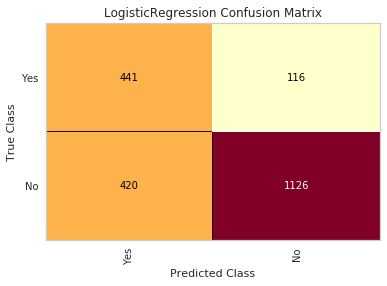

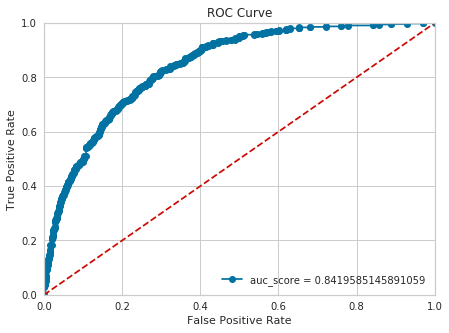

CPU times: user 18.7 s, sys: 254 ms, total: 18.9 s
Wall time: 10.2 s


In [33]:
%%time
#call  train_evaluate_model()
alogrihtm = LogisticRegression()
model_lr =train_evaluate_model(alogrihtm, parameter_lr, cv, train_features, train_labels,test_features, test_labels, label, pos_label )


In [34]:
#save model
save_model(model_lr, 'final_model_lr')

'Model saved'

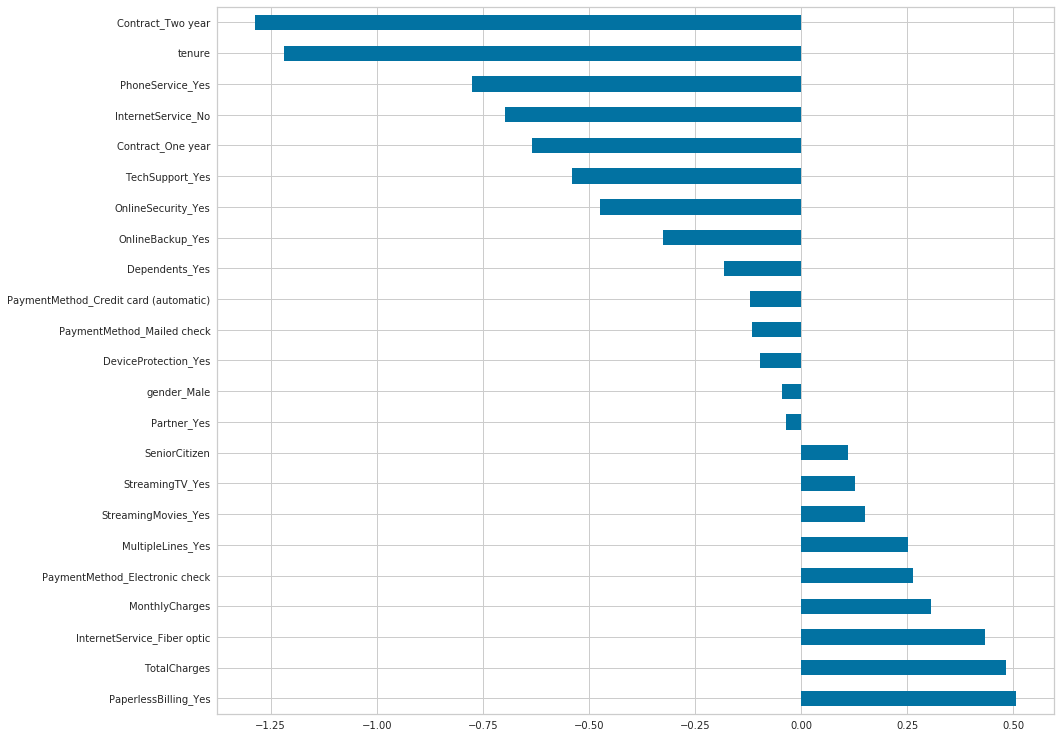

In [201]:
#show features importance in diagram
feat_import = pd.Series(model_lr.coef_.flatten(), index=X_train.columns)
feat_import.nlargest(23).plot(kind='barh',figsize=(15,13))
plt.show()


In [ ]:
# save the model 
save_model(model_lr, 'final_model_lr')


### <a  id="modeldt" style="text-decoration:none "> 4.2 Decision Tree Classifier</a><br>

In [40]:

#parameters
parameter_dt = {'criterion':['entropy','gini'],
              'max_depth':range(1,50),
              'min_samples_leaf': range(20,100, 10)
              #'max_features': [ 5, 10, 12],
              #'splitter': ['best','random']
              
             }



best parameter:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 20}

Classification acurracy: 0.7627199239182121

Confusion Matrix:
 [[1217  170]
 [ 329  387]]

classification_report:
               precision    recall  f1-score   support

          No       0.79      0.88      0.83      1387
         Yes       0.69      0.54      0.61       716

   micro avg       0.76      0.76      0.76      2103
   macro avg       0.74      0.71      0.72      2103
weighted avg       0.76      0.76      0.75      2103


Confusion Matrix from yellobrick:



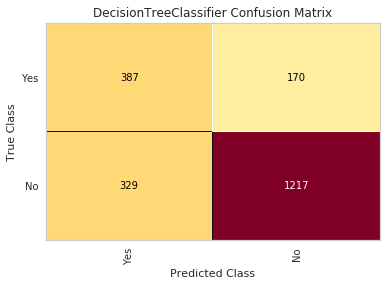

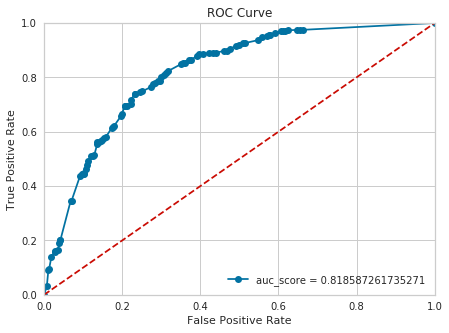

CPU times: user 5min 53s, sys: 1.85 s, total: 5min 55s
Wall time: 6min 11s


In [41]:
%%time
#train with best parameter and evaluate 
alogrihtm = DecisionTreeClassifier( random_state=42)
model_dt =train_evaluate_model(alogrihtm, parameter_dt, cv, train_features, train_labels,test_features, test_labels, label, pos_label )


In [42]:
# save the model 
save_model(model_dt, 'final_model_dt')


'Model saved'

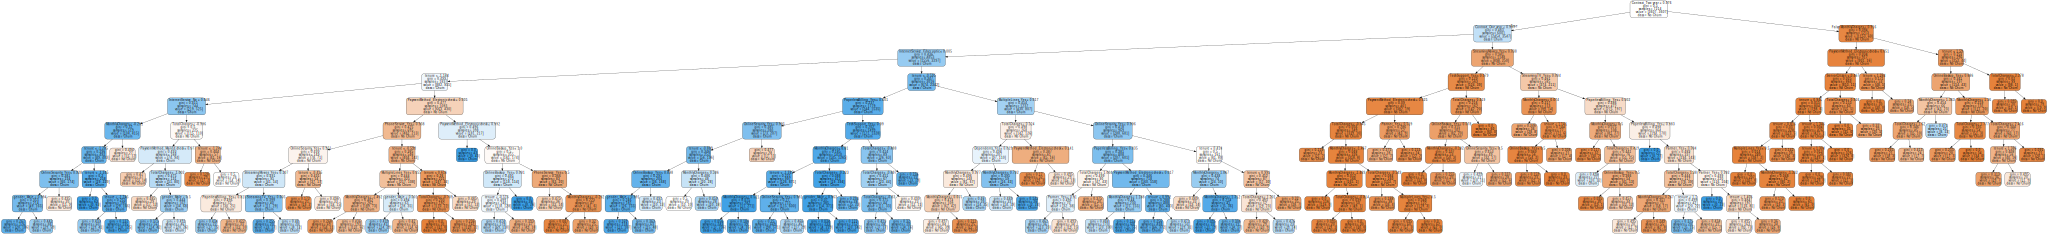

In [206]:
# show in tree-structure 
churnTree = tree.export_graphviz(model_dt, out_file=None, 
                         feature_names = list(X_train.columns.values),  
                         class_names = [ 'No Churn', 'Churn'],
                         filled=True, 
                         rounded=True,
                         special_characters=True)  
graph = graphviz.Source(churnTree) 
#graph.render('decision_tree.gv', view=True)
pydot_graph = pydotplus.graph_from_dot_data(churnTree)
pydot_graph.write_png('original_tree.png') # shave figure
#pydot_graph.set_size('"5,5!"')
#pydot_graph.write_png('resized_tree.png')
graph

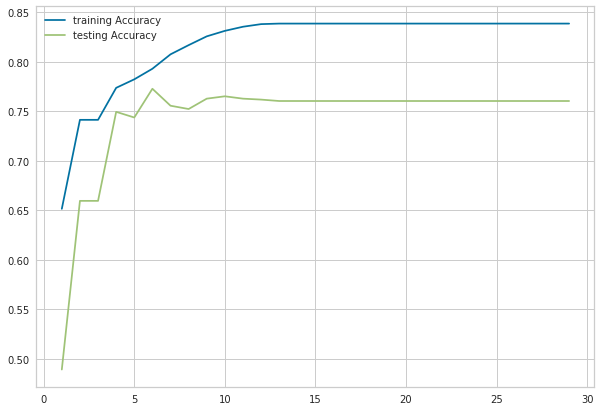

In [215]:
'''==== plot train and test score with respect to 1-50 max_depth ===='''
acc_train = []
acc_test = []


for n in range(1,30):
    
    #decision tree instance
    deci_with_tune = DecisionTreeClassifier(criterion ='gini', max_depth = n, min_samples_leaf=20)
    deci_with_tune.fit(train_features, train_labels )

    
    # prediciton on test data
    predict_tuned = deci_with_tune.predict(test_features)  
    accu_score = accuracy_score(predict_tuned , test_labels)# clasification accuracy
    acc_test.append(accu_score)
    
    
    # prediciton on train data
    train_predict_tuned = deci_with_tune.predict(train_features) 
    train_accu_score = accuracy_score(train_predict_tuned , train_labels)# clasification accuracy
    acc_train.append(train_accu_score)



#creates figure
plt.figure(figsize=(10,7))
x = np.arange(1, 30) # for x-axis
plt.plot(x, acc_train, label='training Accuracy' )
plt.plot(x, acc_test, label='testing Accuracy' )
plt.legend()
plt.show()

#### Note:
At first, with the max_depth equal to 1, the model acuracy is low. Nerverthless, as the no. of depth goes on increasing, the model get better, but after max_depth = 9(nearly), the model perfectly predict the training data but fails to generalize the new data as the max_depth get increased. Thus, this shows that the model will be overfitted if we increase  max_depth.
    

### Lets try look the  top 12 most contributed features

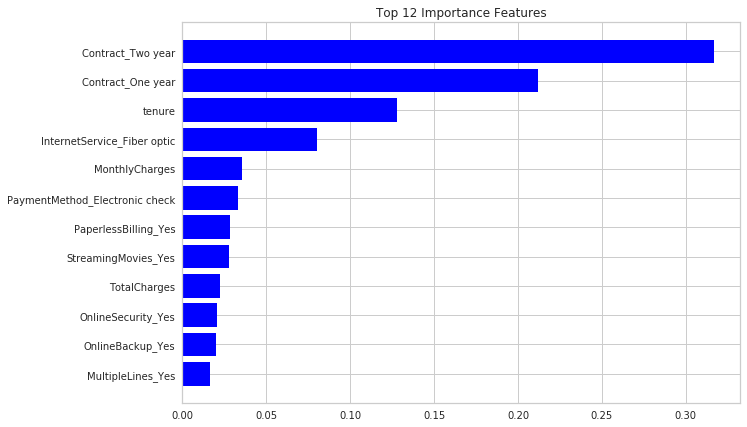

'==Another way=='

In [216]:
'''==== Show Top 12 features contribution to target labels ==='''

coeffs = model_dt.feature_importances_
list_of_coeffs = list(sorted(zip(coeffs, X_train.columns), reverse=True))
x_val = [x[0] for x in list_of_coeffs[:12]]
y_val = [x[1] for x in list_of_coeffs[:12]]

#create figure
plt.figure(figsize=(10,7))
plt.barh( y_val, x_val, align='center', color='blue')
plt.title('Top 12 Importance Features')
plt.gca().invert_yaxis() # first with higest contributed one 
plt.show()

"""==Another way=="""
#feat_importances = pd.Series(coeffs, index=X_train.columns)
#feat_importances.nlargest(10).plot(kind='barh')


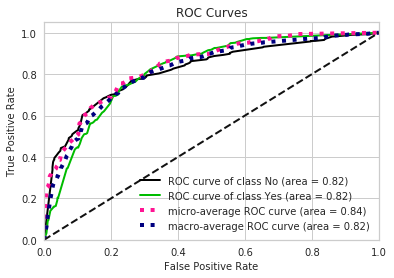

In [406]:
'''=== Another way to draw ROC curve, so handy and efficent === '''
import scikitplot as skplt
y_test_prob_tune = model_dt.predict_proba(X_test)#class probabilities for Auc_score
y_true = y_test# ground truth labels
skplt.metrics.plot_roc(y_true, y_test_prob_tune) # takes  true and predicted lalels
plt.show()

### <a id ="modelrf" style="text-decoration:none ">4.3 Random Forest </a> <br>

In [55]:
#parameter
parameter_ran = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)], #number of trees in the forest
    #'max_features':['auto', 'sqrt'], 
    'max_depth' : [int(x) for x in np.linspace(5, 50, num = 5)], 
    'min_samples_leaf': [int(x) for x in np.linspace(5,105, num =5)]
}


In [ ]:
%%time
#random forest model
algorithm_rf = RandomForestClassifier(random_state=1)
model_rf =train_evaluate_model(algorithm_rf, parameter_ran, cv, train_features, train_labels,test_features, test_labels, label, pos_label )


In [ ]:
# save the model 
save_model(model_rf, 'final_model_rf')

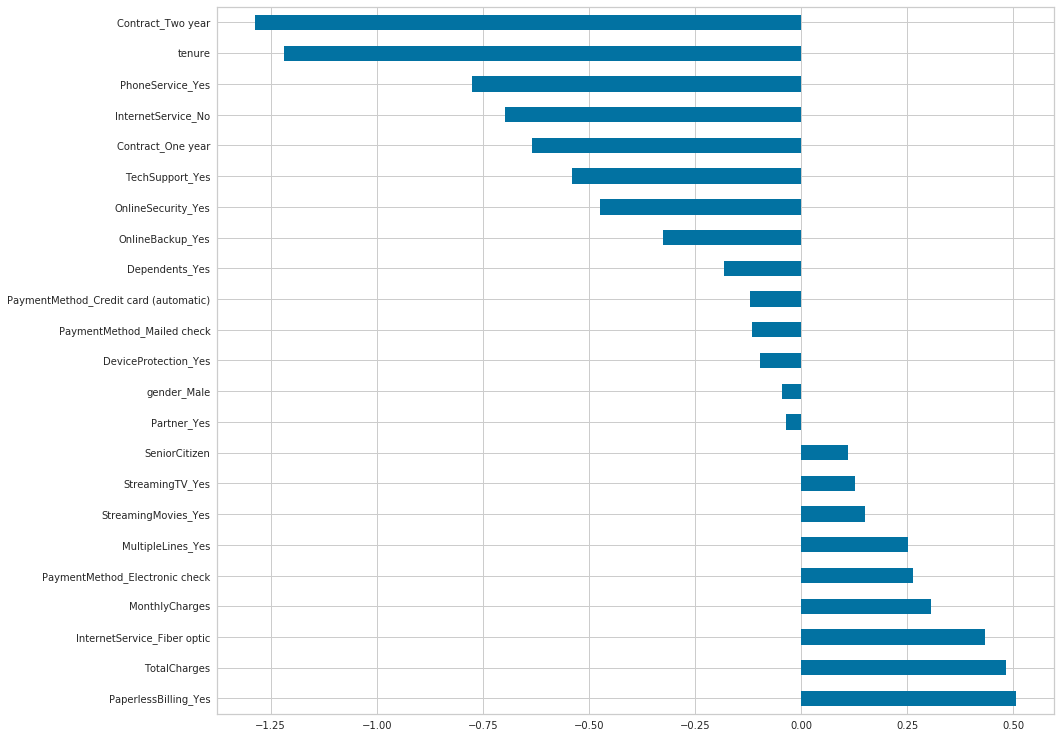

In [413]:
#show features importance in diagram
feat_import_rn = pd.Series(model_rf.feature_importances_.flatten(), index=X_train.columns)
feat_import.nlargest(23).plot(kind='barh',figsize=(15,13))
plt.show()

In [167]:
# show in tree-structure 
churnTree = tree.export_graphviz(model_rf.estimators_[0], out_file=None, 
                         feature_names = list(X_train.columns.values),  
                         class_names = [ 'No Churn', 'Churn'],
                         filled=True, 
                         rounded=True,
                         special_characters=True)  
graph = graphviz.Source(churnTree) 
#graph.render('decision_tree.gv', view=True)
pydot_graph = pydotplus.graph_from_dot_data(churnTree)
pydot_graph.write_png('random_tree.png') # shave figure
#pydot_graph.set_size('"5,5!"')
#pydot_graph.write_png('resized_tree.png')
graph

NameError: name 'model_rf' is not defined

### <a id ="modelgb" style="text-decoration:none ">4.4 Gradient Boosting</a> <br>

In [195]:
#parameter
parameter_grd = {
    'max_depth' : [int(x) for x in np.linspace(5, 50, num = 5)],
    'min_samples_leaf': [int(x) for x in np.linspace(5,105, num =5)],
    'max_features':['auto', 'sqrt'], 
    'learning_rate':[0.001, 0.01, 0.1, 1, 10, 100] # Boosting learning rate
}

Classification acurracy: 0.7727056585829767

Confusion Matrix:
 [[1318  250]
 [ 228  307]]

classification_report:
               precision    recall  f1-score   support

          No       0.85      0.84      0.85      1568
         Yes       0.55      0.57      0.56       535

   micro avg       0.77      0.77      0.77      2103
   macro avg       0.70      0.71      0.70      2103
weighted avg       0.78      0.77      0.77      2103


Confusion Matrix from yellobrick:



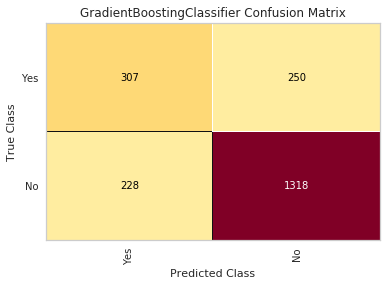

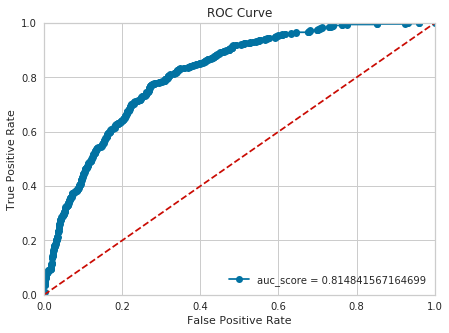

CPU times: user 2h 12min 22s, sys: 15.2 s, total: 2h 12min 38s
Wall time: 2h 12min 51s


In [55]:
%%time
algorithm_grad_boosting = GradientBoostingClassifier(random_state=1)

model_gbm_boosting =train_evaluate_model(algorithm_grad_boosting, parameter_grd, cv, train_features, train_labels,test_features, test_labels, label, pos_label )


In [ ]:
# save the model 
save_model(model_gbm_boosting, 'final_gbm_boosting')

In [ ]:
#show features importance in diagram
feat_import_gbm = pd.Series(model_gbm_boosting.feature_importances_, index=X_train.columns)
feat_import_gbm.nlargest(15).plot(kind='barh',figsize=(10,9)).invert_yaxis()# show most import first
plt.show()

### <a  id="modelxgb" style="text-decoration:none ">4.5 XGboost Classifier</a> <br>

In [183]:
#parameters
parameter_xgboost = {
    'max_depth' : [int(x) for x in np.linspace(5, 50, num = 5)],
    'num_leaves': [int(x) for x in np.linspace(5,105, num =5)],
    #'max_features':['auto', 'sqrt'], 
    #'booster': ['gbtree'],
    'learning_rate':[0.001, 0.01, 0.1, 1, 10],
    'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50] #L2 regularization term on weights
    
}

Classification acurracy: 0.776034236804565

Confusion Matrix:
 [[1295  220]
 [ 251  337]]

classification_report:
               precision    recall  f1-score   support

          No       0.84      0.85      0.85      1515
         Yes       0.61      0.57      0.59       588

   micro avg       0.78      0.78      0.78      2103
   macro avg       0.72      0.71      0.72      2103
weighted avg       0.77      0.78      0.77      2103


Confusion Matrix from yellobrick:



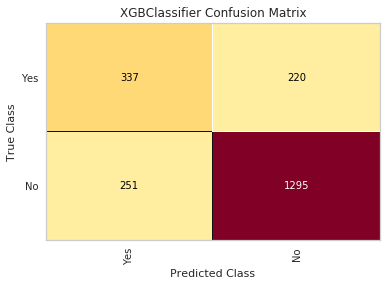

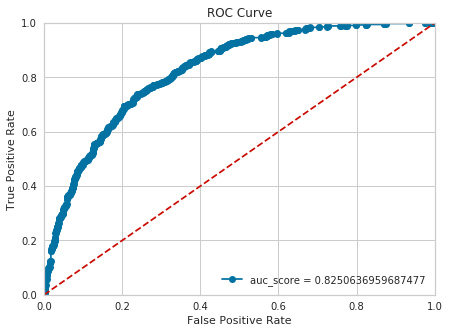

CPU times: user 4.73 s, sys: 35.7 ms, total: 4.76 s
Wall time: 4.91 s


In [161]:
#tune parameters and show performance on test set
algorithm_xgboost = XGBClassifier(random_state=1)

model_xgboost =train_evaluate_model(algorithm_xgboost, parameter_xgboost, cv, train_features, train_labels,test_features, test_labels, label, pos_label )


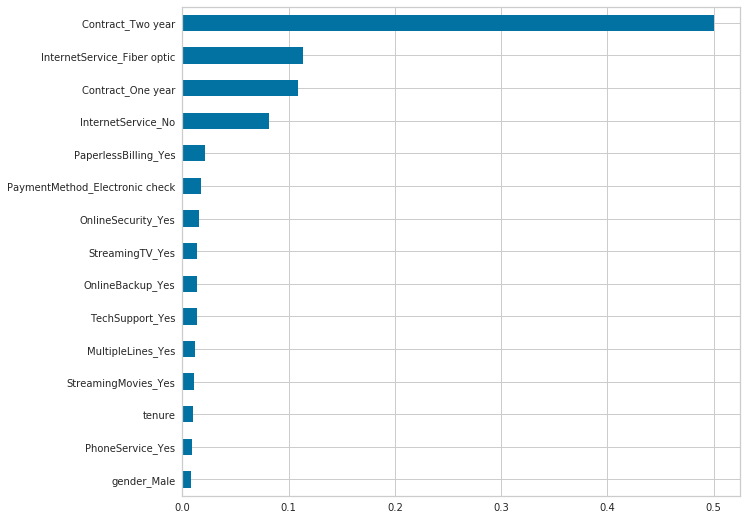

In [194]:
#show features importance in diagram
feat_import_gbm = pd.Series(model_xgboost.feature_importances_, index=X_train.columns)
feat_import_gbm.nlargest(15).plot(kind='barh',figsize=(10,9)).invert_yaxis()# show most import first
plt.show()

In [165]:
# save the model 
save_model(model_xgboost, 'final_model_xgboost')

'Model saved'

### <a id="modelxgl" style="text-decoration:none ">4.6 LGBMClassifier</a> <br>

In [41]:
parameter_lightgbm = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 1000, num = 5)], #number boosted tre to fit
    'max_depth' : [int(x) for x in np.linspace(5, 50, num = 5)],
    'num_leaves': [int(x) for x in np.linspace(5,105, num =5)],
    #'max_features':['auto', 'sqrt'], 
    'learning_rate':[0.001, 0.01, 0.1, 1, 10],
    #'booster': ['gbtree'],
    'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50] #L2 regularization term on weights
    
}

Classification acurracy: 0.7798383262006657

Confusion Matrix:
 [[1303  220]
 [ 243  337]]

classification_report:
               precision    recall  f1-score   support

          No       0.84      0.86      0.85      1523
         Yes       0.61      0.58      0.59       580

   micro avg       0.78      0.78      0.78      2103
   macro avg       0.72      0.72      0.72      2103
weighted avg       0.78      0.78      0.78      2103


Confusion Matrix from yellobrick:



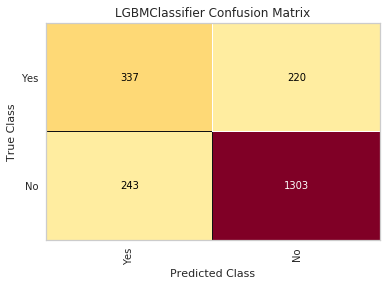

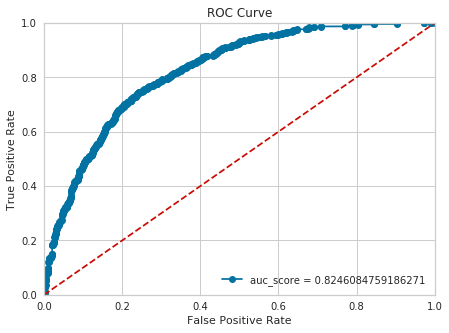

CPU times: user 1d 22h 37min 6s, sys: 17min 8s, total: 1d 22h 54min 15s
Wall time: 11h 58min 44s


In [42]:
%%time
algorithm_lightgbm = LGBMClassifier(random_state=1)

model_gbm = train_evaluate_model(algorithm_lightgbm, parameter_lightgbm, cv, train_features, train_labels,test_features, test_labels, label, pos_label )


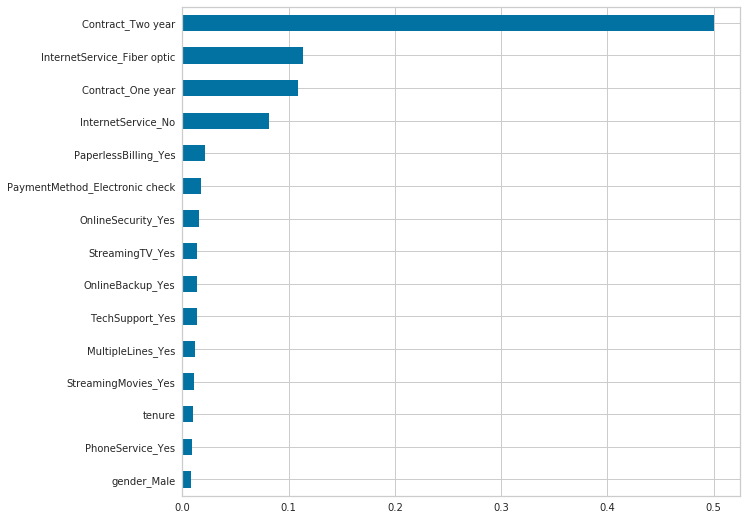

In [189]:
#show features importance in diagram
feat_import_gbm = pd.Series(model_gbm.feature_importances_, index=X_train.columns)
feat_import_gbm.nlargest(15).plot(kind='barh',figsize=(10,9)).invert_yaxis()# show most import first
plt.show()

In [185]:
# save the model 
save_model(model_gbm, 'final_model_lightgbm')

 
# some time later...
 
# load the model from disk
#loaded_model = joblib.load(filename)

'Model saved'

### <a id="conclusion" style="text-decoration:none"> 5. Conclusion  </a>
Compare the alogrithms perfomance

In [35]:
#dict to store all metrics
model_metric = {"Model": [],
                "Accuracy_score": [],
                "Auc_score": [],
                "Recall_score" : [],
                "Precision" : [],
                "f1_score" : []
                }



# model(with best parameter) perfomance compare
def compare_alg( model_name, model, test_feat, test_label):
    """
    model_name = algorithm name,
    model = model(with best parameter),
    test_feat = test dataset (features), 
    test_label = test labels
    """
    
    #predict with test data
    predict_val = model.predict(test_feat)
    accuracy = accuracy_score(test_label, predict_val) # accuracy score
    roc_auc = roc_auc_score(np.where(test_labels == 'Yes',1, 0), np.where(predict_val == 'Yes',1, 0)) # auc score(takes only number)
    rec_score = recall_score(test_label, predict_val, pos_label = 'Yes') # recall score
    precio_score = precision_score(test_label, predict_val, pos_label = 'Yes') # precious score
    f1score = f1_score(test_label, predict_val, pos_label = 'Yes')  # f1 score
    
    # append values to dict
    model_metric["Model"].append(model_name)
    model_metric["Accuracy_score"].append(accuracy)
    model_metric["Auc_score"].append(roc_auc)
    model_metric["Recall_score"].append(rec_score)
    model_metric["Precision"].append(precio_score)
    model_metric["f1_score"].append(f1score)
    
    print('metric appended')
    
    
    
  

In [50]:
# call  compare_alg()
model_list = [model_lr, model_dt, model_xgboost]
model_name =['Logistic Regression', 'Decision Tree', 'XGBoost Classifier']

for model, name in zip(model_list, model_name):
    compare_alg(name, model, test_features, test_labels)
    
print('All metric appended')
    


metric appended
metric appended
metric appended
All metric appended


In [54]:
#show(mertics) in table
metric_df = pd.DataFrame(model_metric) # change into pandas dataframe
table = ff.create_table(np.round(metric_df, 3)) #create tabel
py.iplot(table)
